In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\NULL CLASS\Play Store Data.csv")

In [3]:
# Clean 'Reviews' column - remove non-numeric entries
df = df[df['Reviews'].str.replace('.', '', regex=False).str.isnumeric()]
df['Reviews'] = df['Reviews'].astype(int)

In [4]:
# Apply filters:
df_filtered = df[
    (df['Reviews'] > 500) &
    (~df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
    (df['Category'].str.upper().str.startswith(('E', 'C', 'B')))
].copy()

In [5]:
# Parse dates and installs
df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'], errors='coerce')
df_filtered['Installs'] = df_filtered['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [6]:
# Drop NA values from essential columns
df_filtered.dropna(subset=['Last Updated', 'Installs'], inplace=True)

In [7]:
# Create a 'Month' column for time series grouping
df_filtered['Month'] = df_filtered['Last Updated'].dt.to_period('M').dt.to_timestamp()

In [8]:
# Group by month and category
monthly_installs = df_filtered.groupby(['Month', 'Category'])['Installs'].sum().reset_index()

In [9]:
# Calculate month-over-month percentage change
monthly_installs['MoM_Growth'] = monthly_installs.groupby('Category')['Installs'].pct_change()

In [10]:
# Determine if it's a growth period over 20%
monthly_installs['Highlight'] = monthly_installs['MoM_Growth'] > 0.2

In [11]:
# Check current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)

In [12]:
# Only proceed if time is between 6 PM and 9 PM IST
if 18 <= now_ist.hour < 21:
    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid")

<Figure size 1400x800 with 0 Axes>

In [27]:
import matplotlib.dates as mdates

FINAL VISUALIZATION

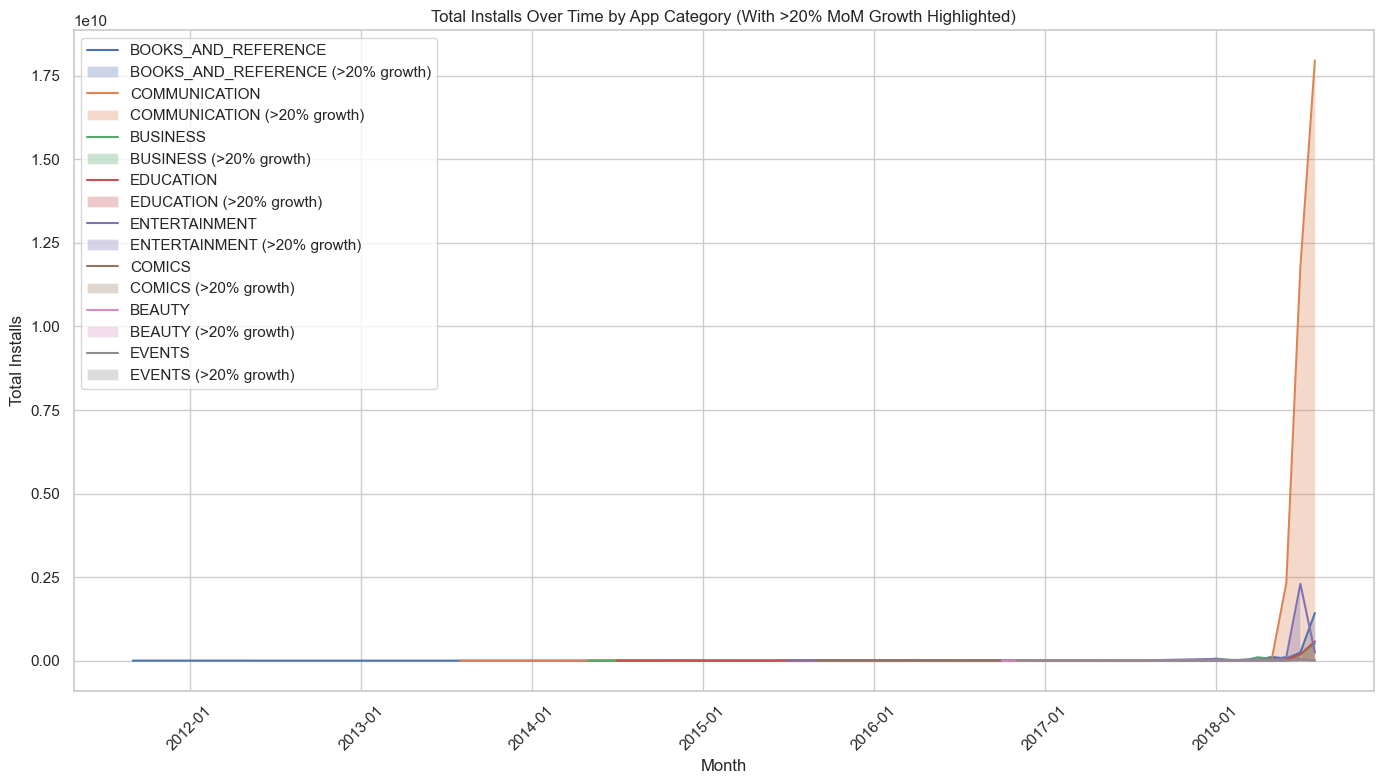

In [30]:

# Example: current IST time check
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)

# Only show chart between 6 PM and 9 PM IST
if 18 <= now_ist.hour < 21:
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid")

    for category in monthly_installs['Category'].unique():
        subset = monthly_installs[monthly_installs['Category'] == category]
        plt.plot(subset['Month'], subset['Installs'], label=category)

        # Highlight >20% MoM growth
        growth = subset[subset['Highlight']]
        if not growth.empty:
            x = mdates.date2num(growth['Month'])
            plt.fill_between(x, 0, growth['Installs'], alpha=0.3, label=f"{category} (>20% growth)")
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.title("Total Installs Over Time by App Category (With >20% MoM Growth Highlighted)")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("The chart is only available between 6 PM and 9 PM IST.")


In [ ]:
"""1. Data Cleaning
Reviews: Filter out apps with fewer than 500 reviews, and remove entries where reviews are not valid numbers (e.g., "3.0M").

Installs: Remove symbols like + and , to convert install numbers into floats.

Dates: Convert Last Updated to a datetime object for time-based grouping.

2. Filtering Criteria
App Name: Must not start with X, Y, or Z.

Category: Must start with E, C, or B (e.g., Education, Beauty, Communication).

Reviews: Must have more than 500.

3. Time Series Aggregation
Group installs by month (converted from Last Updated date) and by category.

Aggregate the total installs for each (Month, Category) pair.


4. Growth Highlighting
Calculate Month-over-Month (MoM) growth:

Growth
=
Current Month Installs
−
Previous Month Installs
Previous Month Installs
Growth= 
Previous Month Installs
Current Month Installs−Previous Month Installs
​
 
Highlight periods where MoM growth is greater than 20%.

5. Visualization
Use line charts to show total installs per category over time.

Use fill_between() to shade areas where install growth exceeds 20%.


6. Time-Based Visibility
Check current time in IST (Indian Standard Time).

Only show the graph between 6 PM and 9 PM IST.



